### chromate

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

import torchvision
from torchvision import datasets, models
from torchvision import transforms

## 1. Data Visulization

In [4]:
base_path = "C:/Users/sec/Desktop/bigleader/DL/deeplearning/data/chromate/"

def load_images_from_folder(folder):

    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        if len(images)>5:
            break

    plt.figure(figsize=(16,8))
    for img,x in zip(images,range(1,7)):
        plt.subplot(2,3,x)
        plt.imshow(img)

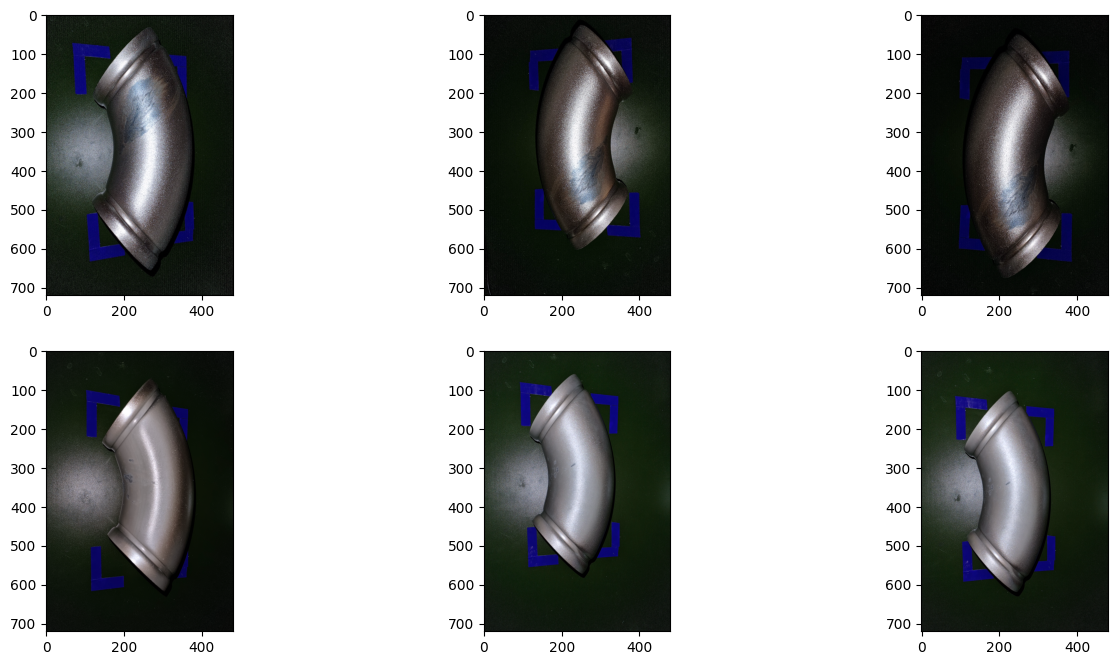

In [5]:
load_images_from_folder(base_path + "NG")

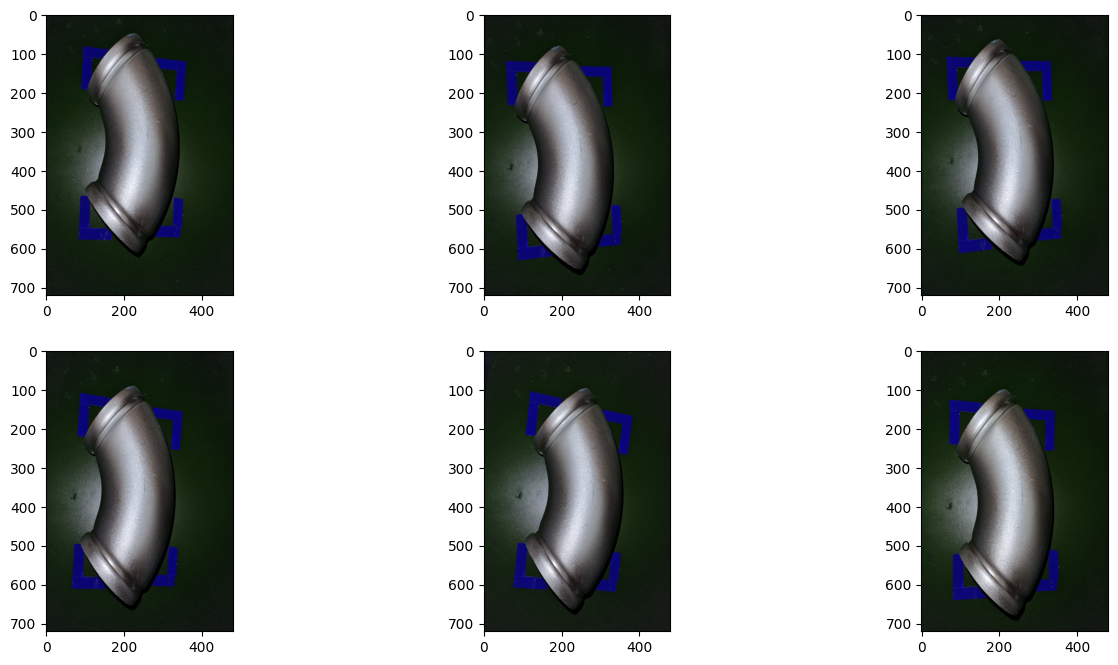

In [6]:
load_images_from_folder(base_path + "OK")

## 2. Data Processing

In [7]:
# Transforms에서 Data Augmentation, Tensor변환, Normalize 변환
# train_transforms = transforms.Compose([
#     transforms.RandomResizedCrop(224),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize(
#         [0.485, 0.456,0.406],
#         [0.229, 0.224, 0.225])])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225])])

In [ ]:
# pip install split-folders

In [12]:
# pip install split-folders
# NG와 OK 폴더를 train, val로 나눔
import splitfolders

splitfolders.ratio('C:/Users/sec/Desktop/bigleader/DL/deeplearning/data/chromate',
                   output='C:/Users/sec/Desktop/bigleader/DL/deeplearning/data/chromate_test', seed=37,ratio=(.8, .1, .1))

Copying files: 174 files [00:00, 182.52 files/s]


In [13]:
def augment_dataset(num_of_aug,set_type,policy=transforms.AutoAugmentPolicy.SVHN) :
    ''' 
    num_of_aug : original dataset에 autoaugment 진행해서 더해줄 cycle의 수.
    (예시로 x -> 2x -> 3x ..)

    set_type : train / test / val 택일

    policy : 굳이 바꿔주고 싶으면 pytorch docs 확인해서 바꾸시오. AutoAugment 종류
    '''

    Compose_dataset = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.AutoAugment(policy),
            transforms.ToTensor(),
            transforms.Normalize(
            [0.485, 0.456,0.406], 
            [0.229, 0.224, 0.225]),
        ])

    result_dataset = []

    for _ in range(num_of_aug):
        
        dataset = datasets.ImageFolder(
                root=f"C:/Users/sec/Desktop/bigleader/DL/deeplearning/data/chromate_test/{set_type}", #path 바꾸시오 안될수도 있음.
                transform=Compose_dataset)
        
        result_dataset = torch.utils.data.ConcatDataset([result_dataset, dataset])

    return result_dataset

In [14]:
# train_dataset = datasets.ImageFolder(root='C:/Users/sec/Desktop/bigleader/DL/deeplearning/data/chromate_test/train',
#           transform=train_transforms)

train_dataset=augment_dataset(4, 'train')

val_dataset = datasets.ImageFolder(root='C:/Users/sec/Desktop/bigleader/DL/deeplearning/data/chromate_test/val',
            transform=val_transforms)

test_dataset = datasets.ImageFolder(root='C:/Users/sec/Desktop/bigleader/DL/deeplearning/data/chromate_test/test',
            transform=test_transforms)

In [15]:
print(train_dataset)
print(val_dataset)
print(test_dataset)

Dataset ImageFolder
    Number of datapoints: 17
    Root location: C:/Users/sec/Desktop/bigleader/DL/deeplearning/data/chromate_test/val
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Dataset ImageFolder
    Number of datapoints: 18
    Root location: C:/Users/sec/Desktop/bigleader/DL/deeplearning/data/chromate_test/test
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [16]:
train_loader = torch.utils.data.DataLoader(
            train_dataset,
            batch_size=16,
            shuffle=True,
            num_workers=4)

val_loader = torch.utils.data.DataLoader(
            val_dataset,
            batch_size=16,
            shuffle=True,
            num_workers=4)

test_loader = torch.utils.data.DataLoader(
            test_dataset,
            batch_size=1,
            shuffle=False)

In [17]:
_,classes=next(iter(test_loader))

In [18]:
classes

tensor([0])

In [19]:
models.list_models()

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

In [ ]:
# pip install efficientnet-pytorch

In [24]:
from efficientnet_pytorch import EfficientNet

model = EfficientNet.from_pretrained('efficientnet-b0')
num_ftrs=model._fc.in_features
model._fc=nn.Linear(num_ftrs, 4)
print(model)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to C:\Users\sec/.cache\torch\hub\checkpoints\efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 21.4MB/s]


Loaded pretrained weights for efficientnet-b0
EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kern

In [ ]:
"""
model = models.efficientnet_b0(pretrained=True)
print(model.classifier)

num_ftrs = model.classifier.features
model.classifier = nn.Sequential(nn.Dropout(p=0.2, inplace=True),nn.Linear(num_ftrs, 4))
print(model.classifier)

https://pytorch.org/vision/main/_modules/torchvision/models/efficientnet.html#EfficientNet_B0_Weights
"""

## 4. Training

In [25]:
from torch.optim.lr_scheduler import StepLR

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),
                      lr=0.001,
                      momentum=0.9)

exp_lr_scheduler = StepLR(optimizer,
                          step_size=7,
                          gamma=0.1)

In [26]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [27]:
# early_stopping 객체 선언(3번의 epoch 연속으로 loss 미개선 시에 조기 종료 예시)
es = EarlyStopping(patience = 3, verbose = True, delta=0.001, path='C:/Users/sec/Desktop/bigleader/DL/deeplearning/data/chromate/chromate_resnet.pt')

num_epochs=10

for epoch in range(num_epochs):
  # Train
  model.train()
  running_loss = 0.0
  running_corrects = 0

  for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()/inputs.size(0)
        running_corrects += \
        torch.sum(preds == labels.data)/inputs.size(0)

  exp_lr_scheduler.step()
  train_epoch_loss = running_loss / len(train_loader)
  train_epoch_acc = running_corrects / len(train_loader)

 # Validation
  model.eval()
  running_loss = 0.0
  running_corrects = 0

  for inputs, labels in val_loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      _, preds = torch.max(outputs,1)
      loss = criterion(outputs, labels)

      running_loss += loss.item()/inputs.size(0)
      running_corrects += torch.sum(preds == labels.data)/inputs.size(0)

  epoch_loss = running_loss / len(val_loader)
  epoch_acc = running_corrects.double() / len(val_loader)

  es(-epoch_acc, model)
  if es.early_stop:
    print(epoch, loss.item())
    break
  print("Train: Loss: {:.4f} Acc: {:.4f}"
    " Val: Loss: {:.4f}"
    " Acc: {:.4f}".format(train_epoch_loss,
                         train_epoch_acc,
                         epoch_loss,
                         epoch_acc))

Validation loss decreased (inf --> -0.781250).  Saving model ...
Train: Loss: 0.0573 Acc: 0.7607 Val: Loss: 0.2203 Acc: 0.7812
EarlyStopping counter: 1 out of 3
Train: Loss: 0.0257 Acc: 0.9143 Val: Loss: 0.1194 Acc: 0.7812
EarlyStopping counter: 2 out of 3
Train: Loss: 0.0146 Acc: 0.9750 Val: Loss: 1.1462 Acc: 0.3438
Validation loss decreased (-0.781250 --> -0.906250).  Saving model ...
Train: Loss: 0.0100 Acc: 0.9804 Val: Loss: 0.0186 Acc: 0.9062
Validation loss decreased (-0.906250 --> -1.000000).  Saving model ...
Train: Loss: 0.0074 Acc: 0.9851 Val: Loss: 0.2716 Acc: 1.0000
EarlyStopping counter: 1 out of 3
Train: Loss: 0.0067 Acc: 0.9756 Val: Loss: 0.2489 Acc: 1.0000
EarlyStopping counter: 2 out of 3
Train: Loss: 0.0044 Acc: 0.9893 Val: Loss: 0.0048 Acc: 1.0000
EarlyStopping counter: 3 out of 3
7 0.012165159918367863


## 5. Testing and Deployment

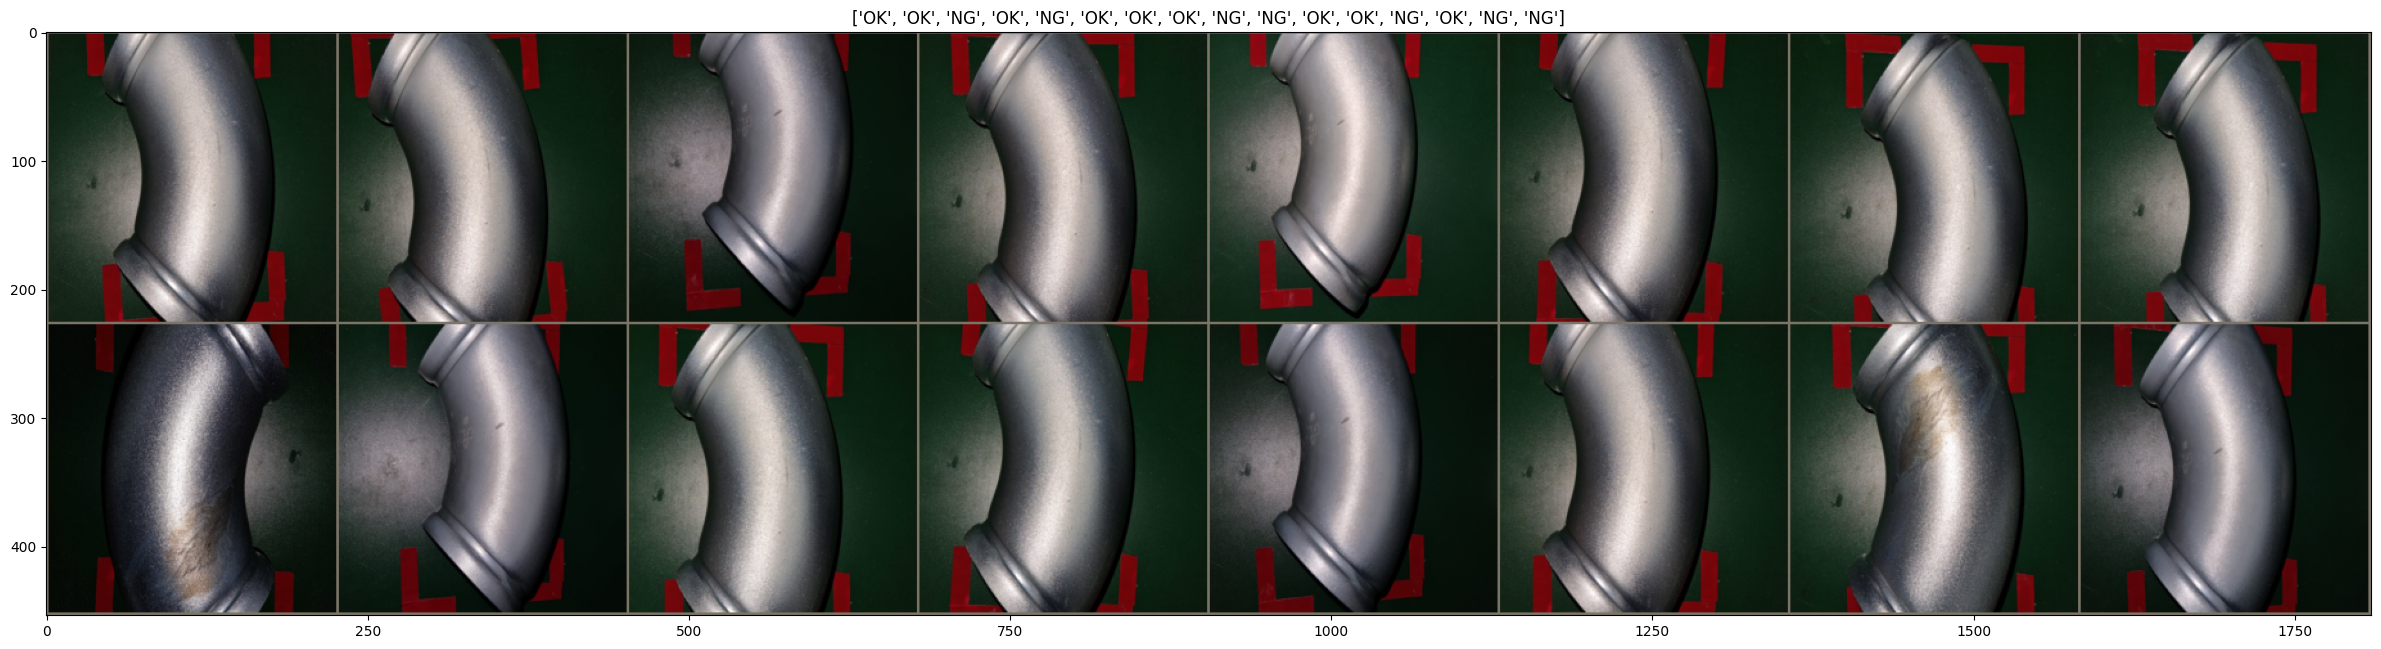

In [28]:
import matplotlib.pyplot as plt

def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)

    plt.figure(figsize=[30, 30])
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

inputs, classes = next(iter(val_loader))
out = torchvision.utils.make_grid(inputs)
class_names = val_dataset.classes

outputs = model(inputs.to(device))
_, preds = torch.max(outputs,1)

imshow(out, title=[class_names[x] for x in preds])

metric

In [34]:
num_correct = 0.0

# 이미지 미니 배치에 대한 예측 리스트를 하나의 리스트로 통합
predicted_list = []
for x_test_batch, y_test_batch in test_loader:
    model.eval()
    y_test_batch = y_test_batch.to(device)
    x_test_batch = x_test_batch.to(device)
    
    y_pred_batch = model(x_test_batch)
    _, predicted = torch.max(y_pred_batch, 1)
    predicted_list.extend(predicted.cpu().numpy())  # 리스트 확장
    num_correct += (predicted == y_test_batch).float().sum()

# 클래스 레이블을 생성
true_labels = []
for _, labels in test_loader:
    true_labels.extend(labels.numpy())  # 리스트 확장

    

accuracy = num_correct/(len(test_loader)*test_loader.batch_size)

print(len(test_loader), test_loader.batch_size)
print("Test Accuracy: {}".format(accuracy))

18 1
Test Accuracy: 1.0


In [30]:
predicted_list

[array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64)]

In [33]:
# sklearn의 classification_report 호출
from sklearn.metrics import classification_report

# efficientnet + agumentation
report = classification_report(true_labels, predicted_list)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

